In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#引用必須
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import keras as kr
import math
import datetime
import pickle
import tqdm
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
sns.set_style("darkgrid")
colors = sns.color_palette("Set2")
#plt.rcParams["font.family"] = ["Microsoft JhengHei"]
plt.rcParams["axes.unicode_minus"] = False

pd.set_option("display.max_rows",1700)
pd.set_option("display.max_columns",2000)


df2=pd.read_csv(r'/content/drive/MyDrive/里_gnn_node_attr_1000m+到11月.csv',encoding ="utf-8")
df1=pd.read_csv(r'/content/drive/MyDrive/里_gnn_1000m.csv',encoding ="utf-8")

In [ ]:
df1

,Source,Target
0,0,8
1,0,10
2,0,19
3,0,23
4,0,24
5,0,26
6,0,38
7,0,81
8,1,86
9,1,85


In [ ]:
df2.sort_values(by=["DIST","VILL","WeekName"],inplace=True,ignore_index=True)
df2

,DIST,VILL,經度,緯度,ID,POSITIVE_NUM,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數
0,中西區,光賢里,23.002914,120.189874,0,2,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0
1,中西區,光賢里,23.002914,120.189874,0,1,1012.228571,21.214286,25.700000,18.171429,82.857143,59.000000,2.771429,85.714286,0.000000,2,0
2,中西區,光賢里,23.002914,120.189874,0,1,1016.642857,17.342857,22.628571,14.285714,75.714286,54.142857,4.171429,12.857143,0.000000,3,0
3,中西區,光賢里,23.002914,120.189874,0,3,1014.685714,18.471429,24.528571,14.642857,70.857143,47.285714,3.100000,162.857143,0.000000,5,0
4,中西區,光賢里,23.002914,120.189874,0,0,1012.342857,21.357143,26.928571,17.571429,80.428571,57.285714,2.900000,140.000000,0.000000,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,永康區,龍潭里,23.031877,120.267513,142,2,1013.971429,26.214286,31.400000,22.957143,77.142857,50.285714,2.085714,298.571429,0.000000,44,6
6106,永康區,龍潭里,23.031877,120.267513,142,3,1015.014286,26.300000,31.414286,23.185714,75.142857,52.857143,2.600000,357.142857,0.000000,45,3
6107,永康區,龍潭里,23.031877,120.267513,142,2,1019.485714,21.614286,27.071429,17.800000,64.285714,45.714286,3.514286,354.285714,0.000000,46,0
6108,永康區,龍潭里,23.031877,120.267513,142,2,1016.271429,22.257143,27.885714,18.142857,70.428571,39.571429,1.928571,341.428571,0.000000,47,0


In [ ]:
dfg=pd.read_csv(r'/content/drive/MyDrive/buildings_cleaned1.csv',encoding ="utf-8")
df_merge=pd.merge(df2,dfg,on=['DIST',"VILL"],how='inner')

In [ ]:
df_merge

,DIST,VILL,經度,緯度,ID,POSITIVE_NUM,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數,"('屋齡', 'max')","('屋齡', 'mean')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'mean')","('樓高_int', 'median')",住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝
0,中西區,光賢里,23.002914,120.189874,0,2,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
1,中西區,光賢里,23.002914,120.189874,0,1,1012.228571,21.214286,25.700000,18.171429,82.857143,59.000000,2.771429,85.714286,0.000000,2,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
2,中西區,光賢里,23.002914,120.189874,0,1,1016.642857,17.342857,22.628571,14.285714,75.714286,54.142857,4.171429,12.857143,0.000000,3,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
3,中西區,光賢里,23.002914,120.189874,0,3,1014.685714,18.471429,24.528571,14.642857,70.857143,47.285714,3.100000,162.857143,0.000000,5,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
4,中西區,光賢里,23.002914,120.189874,0,0,1012.342857,21.357143,26.928571,17.571429,80.428571,57.285714,2.900000,140.000000,0.000000,6,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,永康區,龍潭里,23.031877,120.267513,142,2,1013.971429,26.214286,31.400000,22.957143,77.142857,50.285714,2.085714,298.571429,0.000000,44,6,43,15.193548,11.0,12.0,5.580645,4.0,0.193548,0.064516,0.032258,0.709677
5918,永康區,龍潭里,23.031877,120.267513,142,3,1015.014286,26.300000,31.414286,23.185714,75.142857,52.857143,2.600000,357.142857,0.000000,45,3,43,15.193548,11.0,12.0,5.580645,4.0,0.193548,0.064516,0.032258,0.709677
5919,永康區,龍潭里,23.031877,120.267513,142,2,1019.485714,21.614286,27.071429,17.800000,64.285714,45.714286,3.514286,354.285714,0.000000,46,0,43,15.193548,11.0,12.0,5.580645,4.0,0.193548,0.064516,0.032258,0.709677
5920,永康區,龍潭里,23.031877,120.267513,142,2,1016.271429,22.257143,27.885714,18.142857,70.428571,39.571429,1.928571,341.428571,0.000000,47,0,43,15.193548,11.0,12.0,5.580645,4.0,0.193548,0.064516,0.032258,0.709677


In [ ]:
df_id=df_merge.drop_duplicates(subset=["ID"])#去除重複值
df_id.sort_values(by=["DIST","VILL"],inplace=True,ignore_index=True)

<ipython-input-8-d1af4c0b4a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id.sort_values(by=["DIST","VILL"],inplace=True,ignore_index=True)


In [ ]:
df_id

,DIST,VILL,經度,緯度,ID,POSITIVE_NUM,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數,"('屋齡', 'max')","('屋齡', 'mean')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'mean')","('樓高_int', 'median')",住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝
0,中西區,光賢里,23.002914,120.189874,0,2,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176
1,中西區,西賢里,22.999776,120.173204,1,2,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,38,18.769231,19.5,24.0,7.192308,4.0,0.192308,0.000000,0.000000,0.807692
2,中西區,赤嵌里,22.997194,120.205837,2,0,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,76,31.695652,33.0,20.0,7.673913,5.0,0.195652,0.065217,0.369565,0.369565
3,中西區,郡王里,22.986515,120.207274,3,0,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,50,33.785714,35.5,12.0,5.428571,5.0,0.071429,0.500000,0.285714,0.142857
4,中西區,開山里,22.988670,120.210887,4,0,1017.885714,18.957143,23.057143,16.528571,82.000000,65.714286,3.628571,110.000000,0.071429,1,0,64,26.235294,25.0,6.0,4.691176,5.0,0.000000,0.088235,0.794118,0.117647
5,仁德區,一甲里,22.976559,120.254845,5,0,1017.171429,19.585714,24.157143,17.114286,78.571429,62.000000,2.542857,250.000000,0.071429,1,0,38,23.888889,22.0,4.0,2.222222,2.0,0.000000,0.000000,0.000000,1.000000
6,仁德區,仁和里,22.995016,120.197437,8,1,1017.171429,19.585714,24.157143,17.114286,78.571429,62.000000,2.542857,250.000000,0.071429,1,0,13,12.375000,13.0,14.0,12.916667,14.0,0.875000,0.000000,0.083333,0.041667
7,仁德區,仁德里,22.972119,120.240889,9,2,1017.171429,19.585714,24.157143,17.114286,78.571429,62.000000,2.542857,250.000000,0.071429,1,0,42,12.906250,7.0,24.0,11.578125,7.0,0.390625,0.000000,0.203125,0.406250
8,仁德區,仁愛里,22.995016,120.197437,10,0,1017.171429,19.585714,24.157143,17.114286,78.571429,62.000000,2.542857,250.000000,0.071429,1,0,48,24.666667,28.0,4.0,2.333333,2.0,0.000000,0.000000,0.000000,1.000000
9,仁德區,仁義里,22.968343,120.255831,11,0,1017.171429,19.585714,24.157143,17.114286,78.571429,62.000000,2.542857,250.000000,0.071429,1,0,91,24.313725,28.0,14.0,5.274510,4.0,0.196078,0.000000,0.117647,0.686275


In [ ]:
edge_index=[]
for i in range(0,len(df_id)):
 for j in range(0,len(df1)):
  if (df1["Source"][j] not in list(df_id["ID"])) and (df1["Target"][j] not in list(df_id["ID"])):
    edge_index.append(j)

edge_index=list(set(edge_index))

In [ ]:
df1.drop(edge_index,inplace=True,axis=0)
df1.sort_values(by=["Source"],inplace=True,ignore_index=True)

In [ ]:
class IdEncoder:
    def __init__(self, NodeName_set):
        self.NodeId_dict = {
            NodeName: idx for idx, NodeName in enumerate(sorted(NodeName_set))
        }

    def __len__(self):
        return len(self.NodeId_dict)

    @property
    def NodeName_set(self):
        return set(self.NodeId_dict.keys())

    @property
    def max_id(self):
        return max(self.NodeId_dict.values())

    @property
    def IdNode_dict(self):
        return {idx:NodeName for NodeName, idx in self.NodeId_dict.items()}

    def node_to_id(self, node):
        return self.NodeId_dict.get(node)

    def id_to_node(self, id):
        for NodeName, idx in self.NodeId_dict.items():
            if idx==id: return NodeName
        return None

    def update(self, NodeName_set):
        NewNodeName_set = NodeName_set - self.NodeName_set
        max_id = self.max_id
        self.NodeId_dict.update({
            NodeName: idx+max_id
            for idx, NodeName in enumerate(sorted(NewNodeName_set))
        })

In [ ]:
node_set = set(df1["Target"])|set(df1["Source"])
encode = IdEncoder(node_set)
from_list = df1["Source"].map(encode.NodeId_dict).tolist()
to_list = df1["Target"].map(encode.NodeId_dict).tolist()

In [ ]:
encode.NodeId_dict

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 8: 6,
 9: 7,
 10: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18,
 21: 19,
 22: 20,
 23: 21,
 24: 22,
 25: 23,
 26: 24,
 27: 25,
 28: 26,
 29: 27,
 30: 28,
 31: 29,
 32: 30,
 33: 31,
 34: 32,
 35: 33,
 36: 34,
 37: 35,
 38: 36,
 39: 37,
 40: 38,
 41: 39,
 43: 40,
 44: 41,
 47: 42,
 49: 43,
 50: 44,
 51: 45,
 53: 46,
 55: 47,
 56: 48,
 57: 49,
 58: 50,
 59: 51,
 61: 52,
 63: 53,
 64: 54,
 65: 55,
 66: 56,
 67: 57,
 68: 58,
 69: 59,
 70: 60,
 71: 61,
 72: 62,
 73: 63,
 74: 64,
 75: 65,
 76: 66,
 77: 67,
 78: 68,
 79: 69,
 80: 70,
 81: 71,
 82: 72,
 83: 73,
 84: 74,
 85: 75,
 86: 76,
 87: 77,
 90: 78,
 91: 79,
 92: 80,
 93: 81,
 94: 82,
 95: 83,
 96: 84,
 97: 85,
 98: 86,
 99: 87,
 100: 88,
 101: 89,
 102: 90,
 103: 91,
 104: 92,
 105: 93,
 106: 94,
 107: 95,
 108: 96,
 109: 97,
 110: 98,
 111: 99,
 112: 100,
 113: 101,
 114: 102,
 115: 103,
 116: 104,
 117: 105,
 122: 106,
 123: 107,
 124: 108,
 125: 1

In [ ]:
df1["Source"]=df1["Source"].map(encode.NodeId_dict)
df1["Target"]=df1["Target"].map(encode.NodeId_dict)

In [ ]:
df_merge["change_ID"]=df_merge["ID"].map(encode.NodeId_dict)

In [ ]:
df_merge

,DIST,VILL,經度,緯度,ID,POSITIVE_NUM,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數,"('屋齡', 'max')","('屋齡', 'mean')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'mean')","('樓高_int', 'median')",住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝,change_ID,risk
0,中西區,光賢里,23.002914,120.189874,0,2,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176,0,0
1,中西區,西賢里,22.999776,120.173204,1,2,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,38,18.769231,19.5,24.0,7.192308,4.0,0.192308,0.000000,0.000000,0.807692,1,0
2,中西區,赤嵌里,22.997194,120.205837,2,0,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,76,31.695652,33.0,20.0,7.673913,5.0,0.195652,0.065217,0.369565,0.369565,2,0
3,中西區,郡王里,22.986515,120.207274,3,0,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,50,33.785714,35.5,12.0,5.428571,5.0,0.071429,0.500000,0.285714,0.142857,3,0
4,中西區,開山里,22.988670,120.210887,4,0,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,64,26.235294,25.0,6.0,4.691176,5.0,0.000000,0.088235,0.794118,0.117647,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,永康區,王行里,23.005405,120.233968,138,3,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,0,18,14.500000,14.5,4.0,3.500000,3.5,0.000000,0.000000,0.500000,0.500000,121,1
5918,永康區,甲頂里,23.021609,120.221239,139,3,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,1,48,38.888889,39.0,16.0,3.777778,2.0,0.111111,0.000000,0.000000,0.888889,122,1
5919,永康區,西橋里,23.013270,120.232315,140,0,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,0,42,34.409091,35.0,9.0,4.863636,5.0,0.000000,0.318182,0.318182,0.363636,123,0
5920,永康區,西灣里,23.010272,120.258493,141,4,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,0,42,22.666667,29.0,9.0,5.238095,4.0,0.000000,0.000000,0.452381,0.547619,124,1


In [ ]:
df_merge.sort_values(by=["WeekName","change_ID"],inplace=True,ignore_index=True)

In [ ]:
df_merge["POSITIVE_NUM"].value_counts()

1     1025
0      990
3      905
2      902
4      705
5      530
6      345
7      219
8      171
9       66
10      44
11      16
12       4
Name: POSITIVE_NUM, dtype: int64

In [ ]:
#將陽性數轉成risk(分類)
df_merge["risk"]=0
for i in range(0,len(df_merge)):
  if df_merge["POSITIVE_NUM"][i]>3:
    df_merge["risk"][i]=1
  #elif df_merge["POSITIVE_NUM"][i]==0:
  #  df_merge["risk"][i]=0
  else:
    df_merge["risk"][i]=0

<ipython-input-92-72819d3d80dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["risk"][i]=0
<ipython-input-92-72819d3d80dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["risk"][i]=1


In [ ]:
df_merge

,DIST,VILL,經度,緯度,ID,POSITIVE_NUM,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數,"('屋齡', 'max')","('屋齡', 'mean')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'mean')","('樓高_int', 'median')",住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝,change_ID,risk
0,中西區,光賢里,23.002914,120.189874,0,2,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,47,19.735294,20.5,15.0,7.176471,5.0,0.352941,0.000000,0.205882,0.441176,0,0
1,中西區,西賢里,22.999776,120.173204,1,2,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,38,18.769231,19.5,24.0,7.192308,4.0,0.192308,0.000000,0.000000,0.807692,1,0
2,中西區,赤嵌里,22.997194,120.205837,2,0,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,76,31.695652,33.0,20.0,7.673913,5.0,0.195652,0.065217,0.369565,0.369565,2,0
3,中西區,郡王里,22.986515,120.207274,3,0,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,50,33.785714,35.5,12.0,5.428571,5.0,0.071429,0.500000,0.285714,0.142857,3,0
4,中西區,開山里,22.988670,120.210887,4,0,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0,64,26.235294,25.0,6.0,4.691176,5.0,0.000000,0.088235,0.794118,0.117647,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,永康區,王行里,23.005405,120.233968,138,3,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,0,18,14.500000,14.5,4.0,3.500000,3.5,0.000000,0.000000,0.500000,0.500000,121,1
5918,永康區,甲頂里,23.021609,120.221239,139,3,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,1,48,38.888889,39.0,16.0,3.777778,2.0,0.111111,0.000000,0.000000,0.888889,122,1
5919,永康區,西橋里,23.013270,120.232315,140,0,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,0,42,34.409091,35.0,9.0,4.863636,5.0,0.000000,0.318182,0.318182,0.363636,123,0
5920,永康區,西灣里,23.010272,120.258493,141,4,1016.550000,23.850000,28.650000,20.200000,72.0,52.500000,2.800000,360.0,0.000000,48,0,42,22.666667,29.0,9.0,5.238095,4.0,0.000000,0.000000,0.452381,0.547619,124,1


In [ ]:
import torch
from IPython.display import clear_output
pt_version = torch.__version__
print(pt_version)

2.1.0+cu121


In [ ]:
#會跑很久
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-geometric
!pip install torch-geometric-temporal

Looking in links: https://pytorch-geometric.com/whl/torch-.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=030748b7a3de61ffdece6f308c34227fd9f5ae0348c2eb82e5c819a08f5782fa
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://pytorch-geometric.com/whl/torch-.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=d10ad3cb4e00812feb69c3ff218cb834cbd9e51b7ab07d1c19617e5bad8e7180
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Succe

In [ ]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import to_networkx
import networkx as nx
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from torch_geometric_temporal.signal import StaticGraphTemporalSignal

In [ ]:
def visualize_graph(graph):
    vis = to_networkx(graph)
    plt.figure(1, figsize=(8,8))
    nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=120, linewidths=13)
    plt.show()


from sklearn.manifold import TSNE
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [ ]:
df2=df_merge

In [ ]:
df2=df2.drop(["VILL","DIST","經度","緯度","WeekName","ID","change_ID"],axis=1)

In [ ]:
df2=df2.drop(["測站氣壓","最高氣溫","最低氣溫","最小相對溼度","風速","風向(360degree)","降水量","案例數","('屋齡', 'max')","('屋齡', 'mean')","('屋齡', 'median')","('樓高_int', 'max')","('樓高_int', 'mean')","('樓高_int', 'median')","住宅大樓(11層含以上有電梯)","公寓(5樓含以下無電梯)","華廈(10層含以下有電梯)","透天厝"],axis=1)#

In [ ]:
#df2=df2.drop([],axis=1)

In [ ]:
#只使用這些特徵並加入時序變化
df2

,POSITIVE_NUM,氣溫,相對溼度,risk
0,2,18.957143,82.0,0
1,2,18.957143,82.0,0
2,0,18.957143,82.0,0
3,0,18.957143,82.0,0
4,0,18.957143,82.0,0
...,...,...,...,...
5917,3,23.850000,72.0,1
5918,3,23.850000,72.0,1
5919,0,23.850000,72.0,0
5920,4,23.850000,72.0,1


In [ ]:
#添加四週內的陽性數
a=int(df_merge.shape[0]/47)#5922/47=126

word="POSITIVE_NUM"
df2[f"{word}__1week_ago"]=0.0
df2[f"{word}__2week_ago"]=0.0
df2[f"{word}__3week_ago"]=0.0
df2[f"{word}__4week_ago"]=0.0


for i in range(0,len(df2)):
  if i>=4*a:
      df2[f"{word}__1week_ago"][i]= df2[f"{word}"][i-a]
      df2[f"{word}__2week_ago"][i]= df2[f"{word}"][i-2*a]
      df2[f"{word}__3week_ago"][i]= df2[f"{word}"][i-3*a]
      df2[f"{word}__4week_ago"][i]= df2[f"{word}"][i-4*a]



<ipython-input-315-019eb06a86f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"{word}__1week_ago"][i]= df2[f"{word}"][i-a]
<ipython-input-315-019eb06a86f5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"{word}__2week_ago"][i]= df2[f"{word}"][i-2*a]
<ipython-input-315-019eb06a86f5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"{word}__3week_ago"][i]= df2[f"{word}"][i-3*a]
<ipython-input-315-019eb06a86f5>:15:

In [ ]:
#添加一週前的氣溫
a=int(df_merge.shape[0]/47)#5922/47=126

word="氣溫"
df2[f"{word}__1week_ago"]=0.0



for i in range(0,len(df2)):
  if i>=a:
      df2[f"{word}__1week_ago"][i]= df2[f"{word}"][i-a]

<ipython-input-316-be126166d2c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"{word}__1week_ago"][i]= df2[f"{word}"][i-a]


In [ ]:
#添加兩週前的相對濕度
a=int(df_merge.shape[0]/47)#5922/47=126

word="相對溼度"
df2[f"{word}__1week_ago"]=0.0
df2[f"{word}__2week_ago"]=0.0



for i in range(0,len(df2)):
  if i>=2*a:
      df2[f"{word}__1week_ago"][i]= df2[f"{word}"][i-a]
      df2[f"{word}__2week_ago"][i]= df2[f"{word}"][i-2*a]


<ipython-input-317-812f32e2ee19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"{word}__1week_ago"][i]= df2[f"{word}"][i-a]
<ipython-input-317-812f32e2ee19>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"{word}__2week_ago"][i]= df2[f"{word}"][i-2*a]


In [ ]:
df2=df2[int(5*a):]#train去除前五周已用掉的特徵
df2=df2.reset_index(drop=True)

In [ ]:
df2

,POSITIVE_NUM,氣溫,相對溼度,risk,POSITIVE_NUM__1week_ago,POSITIVE_NUM__2week_ago,POSITIVE_NUM__3week_ago,POSITIVE_NUM__4week_ago,氣溫__1week_ago,相對溼度__1week_ago,相對溼度__2week_ago
0,1,18.471429,74.285714,0,0.0,3.0,1.0,1.0,21.357143,80.428571,70.857143
1,0,18.471429,74.285714,0,2.0,3.0,3.0,2.0,21.357143,80.428571,70.857143
2,1,18.471429,74.285714,0,1.0,1.0,0.0,0.0,21.357143,80.428571,70.857143
3,2,18.471429,74.285714,0,0.0,2.0,1.0,0.0,21.357143,80.428571,70.857143
4,0,18.471429,74.285714,0,0.0,0.0,1.0,1.0,21.357143,80.428571,70.857143
...,...,...,...,...,...,...,...,...,...,...,...
5287,3,23.850000,72.000000,1,1.0,3.0,5.0,5.0,22.257143,70.428571,64.285714
5288,3,23.850000,72.000000,1,3.0,4.0,4.0,3.0,22.257143,70.428571,64.285714
5289,0,23.850000,72.000000,0,0.0,1.0,1.0,2.0,22.257143,70.428571,64.285714
5290,4,23.850000,72.000000,1,3.0,2.0,2.0,3.0,22.257143,70.428571,64.285714


In [ ]:
#將陽性數轉成risk(分類)，再轉一次以防萬一
for i in range(0,len(df2)):
  if df2["POSITIVE_NUM"][i]>3:
    df2["risk"][i]=1
  #elif df_merge["POSITIVE_NUM"][i]==0:
  #  df_merge["risk"][i]=0
  else:
    df2["risk"][i]=0

<ipython-input-320-b4869efbce12>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["risk"][i]=0
<ipython-input-320-b4869efbce12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["risk"][i]=1


In [ ]:
df2["risk"].value_counts()

0    3213
1    2079
Name: risk, dtype: int64

In [ ]:
#獲得前幾周的特徵就不需要當周的了
df2=df2.drop(["POSITIVE_NUM","氣溫","相對溼度__1week_ago","相對溼度"],axis=1)

In [ ]:
#只到9月則需要執行這格，到11月不用
df2=df2[:3780]

In [ ]:
df2.shape[0]-7*126 #30or42-7

2898

In [ ]:
#到9月執行這格

from sklearn.preprocessing import MinMaxScaler
#DS_Split=0.8
#train_ds_size=round(df2.shape[0]*DS_Split)
train_ds_size=2898
scaler=MinMaxScaler(feature_range=(0,1))
df3=df2.drop(["risk"],axis=1)
df3=scaler.fit_transform(df3.values)
df4=pd.DataFrame(df2["risk"])
x_test,y_test=df3[train_ds_size:],df4[train_ds_size:]
df3,df4=df3[:train_ds_size],df4[:train_ds_size]



print(df3.shape)
print(df4.shape)
print(x_test.shape)
print(y_test.shape)

(2898, 6)
(2898, 1)
(882, 6)
(882, 1)


In [ ]:
#到11月執行這格

from sklearn.preprocessing import MinMaxScaler
#DS_Split=0.8
#train_ds_size=round(df2.shape[0]*DS_Split)
train_ds_size=4410
scaler=MinMaxScaler(feature_range=(0,1))
df3=df2.drop(["risk"],axis=1)
df3=scaler.fit_transform(df3.values)
df4=pd.DataFrame(df2["risk"])
x_test,y_test=df3[train_ds_size:],df4[train_ds_size:]
df3,df4=df3[:train_ds_size],df4[:train_ds_size]



print(df3.shape)
print(df4.shape)
print(x_test.shape)
print(y_test.shape)

(4410, 6)
(4410, 1)
(882, 6)
(882, 1)


In [ ]:
ddf=pd.DataFrame(df3)

In [ ]:
ddf

,0,1,2,3,4,5
0,0.000000,0.250000,0.083333,0.083333,0.331688,0.456395
1,0.166667,0.250000,0.250000,0.166667,0.331688,0.456395
2,0.083333,0.083333,0.000000,0.000000,0.331688,0.456395
3,0.000000,0.166667,0.083333,0.000000,0.331688,0.456395
4,0.000000,0.000000,0.083333,0.083333,0.331688,0.456395
...,...,...,...,...,...,...
4405,0.416667,0.583333,0.500000,0.333333,0.756170,0.648256
4406,0.333333,0.416667,0.666667,0.333333,0.756170,0.648256
4407,0.333333,0.416667,0.250000,0.166667,0.756170,0.648256
4408,0.333333,0.666667,0.666667,0.333333,0.756170,0.648256


In [ ]:
df4

,risk
630,1
631,0
632,1
633,1
634,0
...,...
5035,1
5036,1
5037,1
5038,1


In [ ]:
ddf_test=pd.DataFrame(x_test)

In [ ]:
ddf_test

,0,1,2,3,4,5
0,0.166667,0.166667,0.416667,0.416667,0.748272,0.604651
1,0.333333,0.333333,0.416667,0.583333,0.748272,0.604651
2,0.083333,0.166667,0.250000,0.666667,0.748272,0.604651
3,0.166667,0.250000,0.500000,0.833333,0.748272,0.604651
4,0.083333,0.250000,0.250000,0.416667,0.748272,0.604651
5,0.166667,0.500000,0.583333,0.500000,0.749260,0.625000
6,0.500000,0.583333,0.666667,0.666667,0.749260,0.625000
7,0.666667,0.416667,0.500000,0.500000,0.749260,0.625000
8,0.416667,0.666667,0.416667,0.583333,0.749260,0.625000
9,0.583333,0.416667,0.333333,0.583333,0.749260,0.625000


In [ ]:
y_test

,risk
5040,1
5041,1
5042,1
5043,1
5044,1
5045,1
5046,1
5047,1
5048,1
5049,1


In [ ]:


a=int(df_merge.shape[0]/47)
train_X, train_Y = [], []
for i in range(1,int(ddf.shape[0]/a)+1):
  df5=ddf[a*(i-1):a*i]
  df6=df4[a*(i-1):a*i]
  train_X.append(df5.values)
  train_Y.append(df6.values.flatten())

test_X, test_Y = [], []
for i in range(1,int(ddf_test.shape[0]/a)+1):
  df5=ddf_test[a*(i-1):a*i]
  df6=y_test[a*(i-1):a*i]
  test_X.append(df5.values)
  test_Y.append(df6.values.flatten())


edge_index = torch.tensor(
    df1.values.transpose()
)

train_dataset = StaticGraphTemporalSignal(edge_index=edge_index, edge_weight=np.ones(len(edge_index)),  features=train_X, targets=train_Y)
test_dataset = StaticGraphTemporalSignal(edge_index=edge_index, edge_weight=np.ones(len(edge_index)), features=test_X, targets=test_Y)


In [ ]:
#next(iter(train_dataset))

Data(x=[126, 30], edge_index=[2, 438], edge_attr=[2], y=[126])

In [ ]:
#len(train_dataset.targets)

36

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


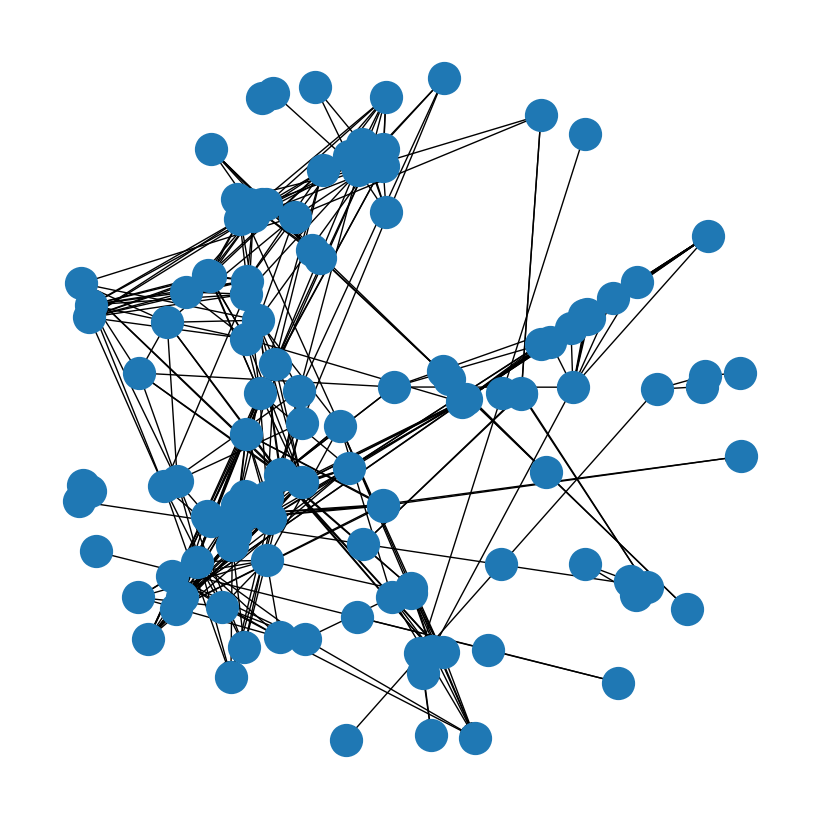

In [ ]:
#visualize_graph(graph)

In [ ]:
class NN_MessagePassingLayer(MessagePassing):
    def __init__(self, input_dim, hidden_dim, output_dim, aggr='mean'):
        super(NN_MessagePassingLayer, self).__init__()
        self.aggr = aggr

        self.messageNN = nn.Linear(input_dim * 2, hidden_dim)
        self.updateNN = nn.Linear(input_dim + hidden_dim, output_dim)

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x, messageNN=self.messageNN, updateNN=self.updateNN)

    def message(self, x_i, x_j, messageNN):
        return messageNN(torch.cat((x_i, x_j), dim=-1))

    def update(self, aggr_out, x, updateNN):
        return updateNN(torch.cat((x, aggr_out), dim=-1))

In [ ]:
class mySTGNN(torch.nn.Module):
    def __init__(self, layer_num, input_dim, hidden_dim, output_dim, aggr='mean', **kwargs):
        super(mySTGNN, self).__init__()
        self.layer_num = layer_num

        self.encoder = nn.Linear(input_dim, hidden_dim)

        # you can use the message passing layer you like, such as GCN, GAT, ......
        self.mp_layer = NN_MessagePassingLayer(input_dim=hidden_dim, hidden_dim=hidden_dim,
                                               output_dim=hidden_dim, aggr=aggr)

        self.decoder = nn.Linear(hidden_dim, output_dim)
        self.lstm = nn.LSTM(input_size = output_dim, hidden_size=4, num_layers=layer_num)
        self.linear = nn.Linear(4, 2)
        #self.dropout = nn.Dropout(0.1)

        self.hidden = self.init_hidden()
    def init_hidden(self):
        return (torch.zeros(2, 1, 4),
                torch.zeros(2, 1, 4))

    def forward(self, x, edge_index):
        x = self.encoder(x)
        for i in range(self.layer_num):
            x = self.mp_layer(x, edge_index)
        node_out = self.decoder(x)
        node_out=node_out.unsqueeze(1)
        #print(node_out.shape)

        self.hidden = self.init_hidden()
        #print(self.hidden)
        x0, self.hidden =self.lstm(node_out,self.hidden)
        x1 = x0[:,-1,:]
        x2 = self.linear(x1)
        return x2

<IPython.core.display.Javascript object>

training CrossEntropyLoss: 0.3600


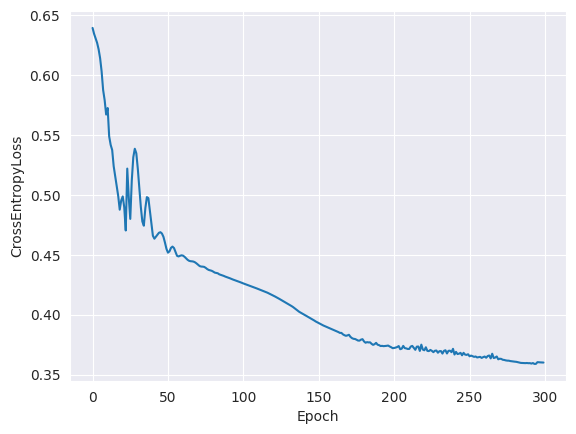

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = mySTGNN(layer_num=2,
        input_dim=ddf.shape[1],
        hidden_dim=8,
        output_dim=16)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
cost_list = []

model.train()
#time为train size
for epoch in range(1, 301):
    cost = 0
    for time,snapshot in enumerate(train_dataset):
        y_hat = model(snapshot.x, snapshot.edge_index)
        #print(y_hat)
        #print(snapshot.y)
        cost = cost + criterion(y_hat, snapshot.y)
    cost = cost / (time + 1)
    cost_list.append(cost.item())
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
cost = cost.item()
print("training CrossEntropyLoss: {:.4f}".format(cost))

plt.plot(cost_list)
plt.xlabel("Epoch")
plt.ylabel("CrossEntropyLoss")
#plt.title("average of Training cost for 10 nodes")
plt.show()


In [ ]:
#得出預測結果和test_true
a=int(df_merge.shape[0]/47)
model.eval()
true=torch.empty(7*a)
prediction=torch.empty(7*a)
for time, snapshot in enumerate(test_dataset):
    y_hat = model(snapshot.x, snapshot.edge_index)
    prediction[a*(time):a*(time+1)]=y_hat.argmax(dim=1).flatten()
    true[a*(time):a*(time+1)]=snapshot.y


ST 準確性：71.54%
ST 精確率：69.00%
ST F1分數: 63.04%
ST 召回率：62.59%
{0: 299, 1: 583}


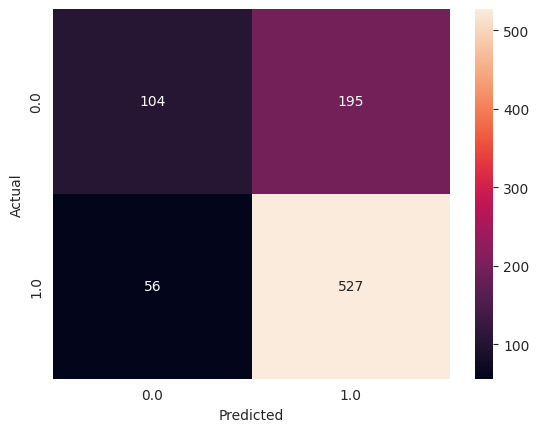

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])

    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')

    if title is None:
        pass
    else:
        plot.set_title(title)

    plt.show()
"""
    for i in range(len(confusion_matrix)):
     print("Class:",str(i))
     print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), f"out of {sum(confusion_matrix[i])}")
     print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i]*100 / sum(confusion_matrix[i])))
     print("***********************************************************")
"""

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


# 計算模型的準確性
accuracy_baseline = accuracy_score(true, prediction)
print(f'ST 準確性：{accuracy_baseline * 100:.2f}%')

# 計算精確率
precision_baseline = precision_score(true, prediction, average='macro', zero_division=1)
print(f'ST 精確率：{precision_baseline * 100:.2f}%')

# 計算F1分數
f1_baseline = f1_score(true, prediction, average='macro')
print(f'ST F1分數: {f1_baseline * 100:.2f}%')

# 計算召回率
recall_baseline = recall_score(true, prediction, average='macro')
print(f'ST 召回率：{recall_baseline * 100:.2f}%')

# 看資料內各分類的總筆數
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))
# 畫confusion matrix
plot_confusion_matrix(true, prediction)